# Using the Virgo Filament Catalogs #

The goals of this notebook: is to show
* how to read in the tables
* what is in the Virgo Filament tables
* how to combine data from multiple tables
* how to make your own table that contains your favorite variables

# Overview of Tables #
## Main Catalog ##
|Table | Brief Description |
|------|-------------------|
|vf_north_v0_main.fits| The main catalog.  Gives flags to indicate if galaxy is in other catalogs.|

## Parent Catalogs ##
|Table | Brief Description |
|------|-------------------|
|vf_north_v0_hyperleda.fits|Hyperleda catalog |
|vf_north_v0_nsa.fits| NSA version 1 |
|vf_north_v0_nsa_v0.fits| NSA version 0|
|vf_north_v0_a100.fits| A100 cross match |


## Our Catalogs ##
|Table | Brief Description |
|------|-------------------|
|vf_north_v0_co.fits | |
|vf_north_v0_ha.fits| Halpha catalog (under construction) |

## Ancillary Catalogs ##
|Table | Brief Description |
|------|-------------------|
|vf_north_v0_steer17.fits| Steer+17 distance catalog|
|vf_north_v0_z0mgs.fits| z=0 Multiwavelength Galaxy Survey (Leroy+2019) |
|vf_north_v0_main_unwise.fits|unWISE catalog match |
|vf_north_v0_main_env_prop_H0_74_0.fits| Gianluca's environment catalog |
|vf_north_v0_a100_sdssphot.fits| sdss phot matched to A100 (Durbala+2020) |
|vf_north_v0_a100_unwise.fits| unwise matches to A100 sample (Durbala+2020) |
|vf_north_v0_groups.fits| output from John Moustakas's group-finding code.  For legacy images only.|

In [2]:
from astropy.table import Table
from matplotlib import pyplot as plt
%matplotlib notebook
import os

# 1: Reading in the tables #

* The tables are stored on google drive in the foler vf-tables:
  * https://drive.google.com/drive/folders/1UOQhd1maJeGxoWpivnhTNISwLDEMe0FY?usp=sharing
  * You should all have access to the drive folder
* We are using the North only version.
  * Select V0.
  * Then select the folder with the most recent date.
* Save the tables to your local computer.
  * change tabledir below to reflect the location of your tables
* change the plotdir to the directory where you want the plots saved

In [4]:
tabledir = '/home/rfinn/research/Virgo/tables-north/v0/'
plotdir = '/home/rfinn/research/Virgo/plots/'

## List the available tables ##

In [6]:
os.listdir(tabledir)

['vf_north_v0_groups.fits',
 'vf_north_v0_nsa.fits',
 'vf_north_v0_a100_unwise.fits',
 'vf_north_v0_ha.fits',
 'vf_north_v0_main.fits',
 'vf_north_v0_steer17.fits',
 'vf_north_v0_a100_sdssphot.fits',
 'vf_north_v0_nsa_v0.fits',
 'vf_north_v0_z0mgs.fits',
 'vf_north_v0_main_unwise.fits',
 'vf_v0_groups.fits',
 'vf_north_v0_a100.fits',
 'vf_north_v0_hyperleda.fits',
 'vf_north_v0_co.fits',
 'vf_north_v0_main_env_prop_H0_74_0.fits']

## Reading Tables ##


In [40]:
maintab = Table.read(tabledir+'vf_north_v0_main.fits')
mgstab = Table.read(tabledir+'vf_north_v0_z0mgs.fits')
hatab = Table.read(tabledir+'vf_north_v0_ha.fits')

In [21]:
main

VFID,RA,DEC,vr,radius,radius_flag,objname,NSAID,NSAIDV0,AGC,NEDname,HLflag,NSAflag,NSAV0flag,A100flag,COflag,Z0MGSflag,Steerflag,unwiseflag
,,,,arcsec,,,,,,,,,,,,,,
bytes8,float32,float32,float32,float32,bool,bytes28,int32,int32,int64,bytes30,bool,bool,bool,bool,bool,bool,bool,bool
VFID0000,185.86877,74.95225,1418.8,23.829847,True,NGC4363,0,0,0,NGC 4363,True,False,False,False,False,True,False,False
VFID0001,182.208,74.904274,1331.5,49.6731,True,NGC4133,0,0,0,NGC 4133,True,False,False,False,False,True,True,False
VFID0002,145.94466,74.85958,3049.4,62.3909,True,NGC2977,0,0,0,NGC 2977,True,False,False,False,False,True,True,False
VFID0003,185.57309,74.83839,1833.0,26.128908,True,PGC040048,0,0,0,CGCG 352-030,True,False,False,False,False,True,False,False
VFID0004,182.82774,74.80822,1683.0,40.937492,True,UGC07189,0,0,0,UGC 07189,True,False,False,False,False,True,False,False
VFID0005,173.13419,74.62754,1920.1,48.654305,True,NGC3752,0,0,0,NGC 3752,True,False,False,False,False,True,True,True
VFID0006,121.91241,74.58463,2333.0,26.984928,True,UGC04202,0,0,0,UGC 04202,True,False,False,False,False,True,True,False
VFID0007,118.2363,74.57653,2346.0,23.448833,True,PGC022064,0,0,0,KUG 0746+747,True,False,False,False,False,True,False,False


# Listing columns in a table#

* if you want to get a list of the variables that are in a specific table

In [47]:
maintab.colnames

['VFID',
 'RA',
 'DEC',
 'vr',
 'radius',
 'radius_flag',
 'objname',
 'NSAID',
 'NSAIDV0',
 'AGC',
 'NEDname',
 'HLflag',
 'NSAflag',
 'NSAV0flag',
 'A100flag',
 'COflag',
 'Z0MGSflag',
 'Steerflag',
 'unwiseflag']

# Sample Statistics #

We can use the flags in the main table to calculate the fraction of the sample in each category.

For example, we can calculate the fraction of the sample that has Hyperleda data

In [31]:
print('total number of galaxies in the catalog = ',len(maintab))
print('number with HL data = ',sum(maintab['HLflag']))
print('fraction with HL data = %.3f '%(sum(maintab['HLflag'])/len(maintab)))

total number of galaxies in the catalog =  6860
number with HL data =  6619
fraction with HL data = 0.965 


# Making Plots #

## Positions ##

<IPython.core.display.Javascript object>


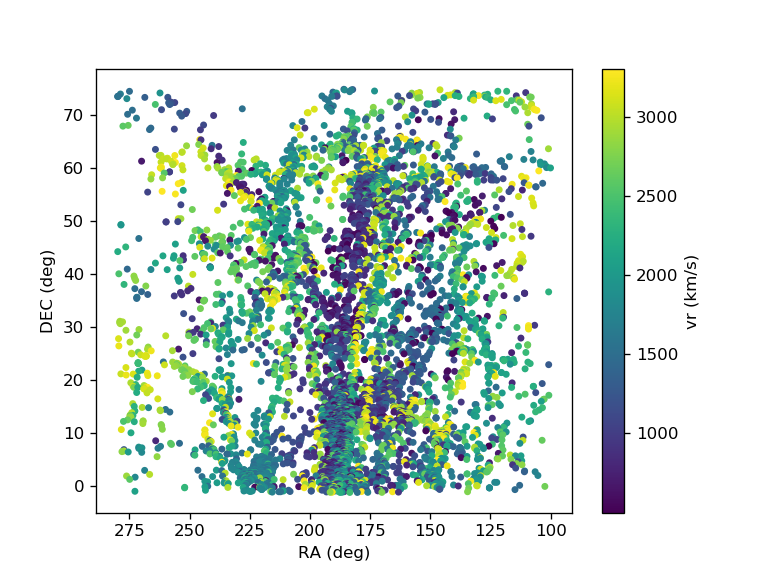

In [22]:
plt.figure()
plt.scatter(main['RA'],main['DEC'],c=main['vr'],s=10)
plt.xlabel('RA (deg)')
plt.ylabel('DEC (deg)')
cb = plt.colorbar()
cb.set_label('vr (km/s)')
ax = plt.gca()
ax.invert_xaxis()

## Positions of Subsamples ##

<IPython.core.display.Javascript object>


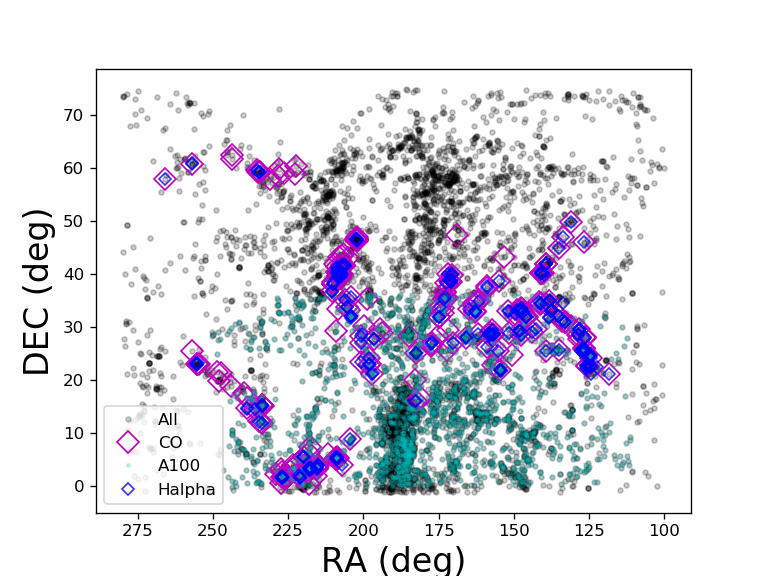

In [46]:
plt.figure()
plt.plot(maintab['RA'],maintab['DEC'],'k.',alpha=.2,label='All')
# plot CO sources
flag =  maintab['COflag']
plt.plot(maintab['RA'][flag],maintab['DEC'][flag],'mD',markersize=9,mfc='None',alpha=1,label='CO')
# HI sources
flag =  maintab['A100flag']
plt.plot(maintab['RA'][flag],maintab['DEC'][flag],'co',markersize=2,alpha=.2,label='A100')
flag =  hatab['haflag']
plt.plot(maintab['RA'][flag],maintab['DEC'][flag],'bD',markersize=5,mfc='None',alpha=.8,label='Halpha')
plt.legend()#label='vr (km/s)')
plt.gca().invert_xaxis()
plt.xlabel('RA (deg)',fontsize=20)
plt.ylabel('DEC (deg)',fontsize=20)
plt.savefig('/home/rfinn/research/Virgo/plots/CO-sources.png')

In [42]:
hatab

VFID,RA,DEC,vr,objname,NSAID,NSAIDV0,AGC,NEDname,HLflag,NSAflag,NSAV0flag,A100flag,NED,RA_ha,DEC_ha,Vr,CO,HI,Halpha,Pointing,Date Obs,Date Obs2,Alt Point,Date Obs3,Filament,Group,Telescope,filter,Dithers,R expt (s),Halpha expt (s),R expt tot,Halpha exp tot,R FWHM (iraf),R FWHM,Ha4 FWHM (iraf),Ha4 FWHM,haflag
bytes8,float32,float32,float32,bytes28,int32,int64,int64,bytes30,bool,bool,bool,bool,bytes12,float64,float64,float64,int64,int64,int64,bytes14,bytes10,bytes10,bytes6,bytes10,int64,int64,bytes9,bytes8,int64,int64,bytes13,int64,int64,float64,float64,float64,float64,bool
VFID0000,185.86877,74.95225,1418.8,NGC4363,0,0,0,NGC 4363,True,False,False,False,N/A,nan,nan,nan,--,--,--,N/A,N/A,N/A,N/A,N/A,--,--,N/A,N/A,--,--,N/A,--,--,nan,nan,nan,nan,False
VFID0001,182.208,74.904274,1331.5,NGC4133,0,0,0,NGC 4133,True,False,False,False,N/A,nan,nan,nan,--,--,--,N/A,N/A,N/A,N/A,N/A,--,--,N/A,N/A,--,--,N/A,--,--,nan,nan,nan,nan,False
VFID0002,145.94466,74.85958,3049.4,NGC2977,0,0,0,NGC 2977,True,False,False,False,N/A,nan,nan,nan,--,--,--,N/A,N/A,N/A,N/A,N/A,--,--,N/A,N/A,--,--,N/A,--,--,nan,nan,nan,nan,False
VFID0003,185.57309,74.83839,1833.0,PGC040048,0,0,0,CGCG 352-030,True,False,False,False,N/A,nan,nan,nan,--,--,--,N/A,N/A,N/A,N/A,N/A,--,--,N/A,N/A,--,--,N/A,--,--,nan,nan,nan,nan,False
VFID0004,182.82774,74.80822,1683.0,UGC07189,0,0,0,UGC 07189,True,False,False,False,N/A,nan,nan,nan,--,--,--,N/A,N/A,N/A,N/A,N/A,--,--,N/A,N/A,--,--,N/A,--,--,nan,nan,nan,nan,False
VFID0005,173.13419,74.62754,1920.1,NGC3752,0,0,0,NGC 3752,True,False,False,False,N/A,nan,nan,nan,--,--,--,N/A,N/A,N/A,N/A,N/A,--,--,N/A,N/A,--,--,N/A,--,--,nan,nan,nan,nan,False
VFID0006,121.91241,74.58463,2333.0,UGC04202,0,0,0,UGC 04202,True,False,False,False,N/A,nan,nan,nan,--,--,--,N/A,N/A,N/A,N/A,N/A,--,--,N/A,N/A,--,--,N/A,--,--,nan,nan,nan,nan,False
VFID0007,118.2363,74.57653,2346.0,PGC022064,0,0,0,KUG 0746+747,True,False,False,False,N/A,nan,nan,nan,--,--,--,N/A,N/A,N/A,N/A,N/A,--,--,N/A,N/A,--,--,N/A,--,--,nan,nan,nan,nan,False
VFID0008,274.94318,74.56839,1484.5,NGC6643,0,0,0,NGC 6643,True,False,False,False,N/A,nan,nan,nan,--,--,--,N/A,N/A,N/A,N/A,N/A,--,--,N/A,N/A,--,--,N/A,--,--,nan,nan,nan,nan,False
